In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
#import manage_database
import sqlite3
import pyodbc as odbc
import sys

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



try:
    conn = odbc.connect('Driver={SQL Server};'
                              'Server=;LAPTOP-V2DHN538;'
                              'Database=resturents;'
                              'Trusted_Connection=yes;',autocommit=True)
except Exception as e:
    print(e)
    print("task is terminated")
    sys.exit()
else:
    cursor = conn.cursor()
     







['aaa', 'abc', 'AbeLouies', 'CaféSusubySuitsupply', 'Carmelinas', 'FogodeChão', 'KantipurCafe', 'MSreplication_options', 'Ostra', 'SaltieGirl', 'spt_fallback_db', 'spt_fallback_dev', 'spt_fallback_usg', 'spt_monitor', 'Tanám', 'Toro', 'xx', 'xxx', 'trace_xe_action_map', 'trace_xe_event_map']


In [8]:
resturentsList=['CaféSusubySuitsupply', 'Carmelinas', 'FogodeChão', 'KantipurCafe','Ostra', 'SaltieGirl','Tanám', 'Toro']


for _ in resturentsList:
    sql = pd.read_sql(f"select rate from {_}",conn)
    df = pd.DataFrame(sql,columns = ['rate'])
    print(_)
    print(df.describe())
    print()


CaféSusubySuitsupply
          rate
count  40.0000
mean    4.6000
std     0.7779
min     2.0000
25%     4.7500
50%     5.0000
75%     5.0000
max     5.0000

Carmelinas
            rate
count  10.000000
mean    4.700000
std     0.674949
min     3.000000
25%     5.000000
50%     5.000000
75%     5.000000
max     5.000000

FogodeChão
            rate
count  60.000000
mean    4.500000
std     0.929735
min     1.000000
25%     4.000000
50%     5.000000
75%     5.000000
max     5.000000

KantipurCafe
            rate
count  20.000000
mean    4.750000
std     0.638666
min     3.000000
25%     5.000000
50%     5.000000
75%     5.000000
max     5.000000

Ostra
            rate
count  50.000000
mean    4.560000
std     0.836904
min     2.000000
25%     4.250000
50%     5.000000
75%     5.000000
max     5.000000

SaltieGirl
            rate
count  80.000000
mean    4.412500
std     0.989742
min     1.000000
25%     4.000000
50%     5.000000
75%     5.000000
max     5.000000

Tanám
            rat

rating distribution


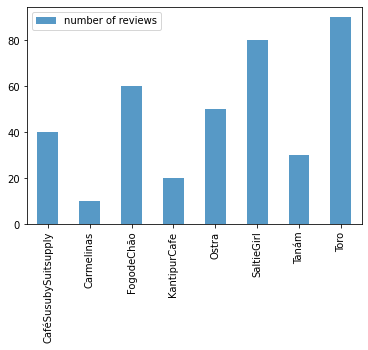

In [31]:
res_dic = {"resturents":['CaféSusubySuitsupply', 'Carmelinas', 'FogodeChão', 'KantipurCafe','Ostra', 'SaltieGirl','Tanám', 'Toro'],"number of reviews":[]}
df = None
for _ in resturentsList:
    sql = pd.read_sql(f"select rate from {_}",conn)
    df = pd.DataFrame(sql,columns = ['rate'])
    res_dic["number of reviews"].append(len(df.index))

    
name = res_dic["resturents"]
reviews =res_dic["number of reviews"]

df2 = pd.DataFrame(res_dic)

print("rating distribution")
df2.set_index(["resturents"],inplace=True)
df2.plot(kind='bar',alpha=0.75, rot=90)
plt.xlabel("")
plt.show()
    

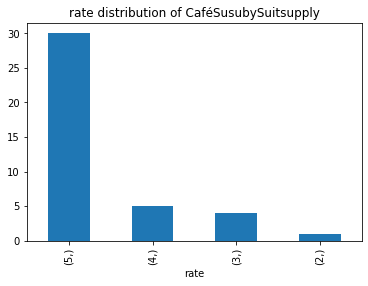

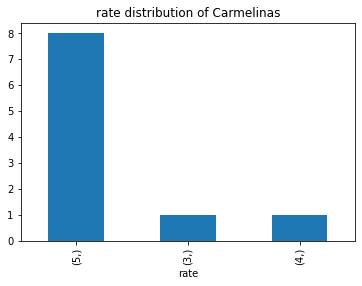

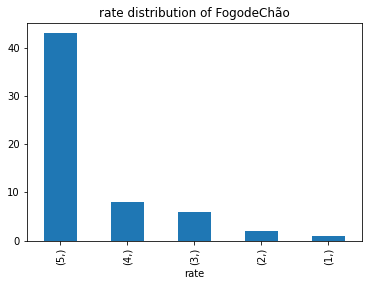

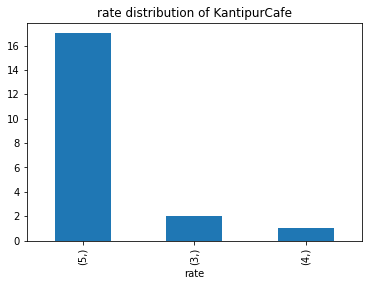

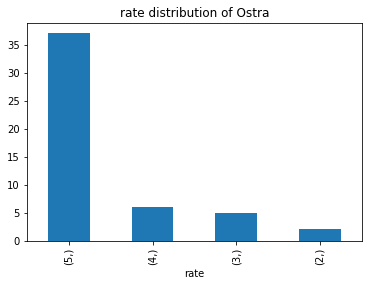

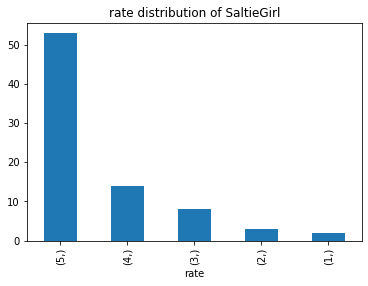

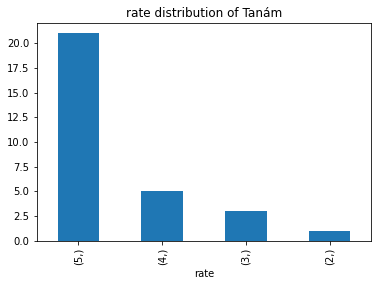

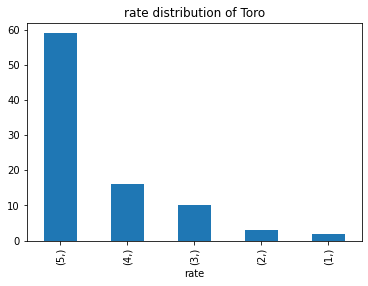

In [61]:
rating = {"rating":[1,2,3,4,5],"rating count":[0,0,0,0,0]}
for _ in resturentsList:
    sql = pd.read_sql(f"select rate from {_}",conn)
    df = pd.DataFrame(sql,columns = ['rate'])
    rc=df.value_counts()
    rc.plot.bar(x=rc.head(),y=rc.values,title=f"rate distribution of {_}")
    plt.show()

# sentiment analyse

In [1]:
import import_ipynb
import re
import string
from textblob import TextBlob


In [22]:

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('\n','',text)
    return text

cleaned1 = lambda x:text_clean_1(x)

def word_count(text):
    return (len(text.split(" ")))
    
wordcount = lambda x:word_count(x)  


def checkresponse(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment >0:
        return "happy"
    
    else:
        return "not happy"

response = lambda x: checkresponse(x)


In [23]:
def getResponse(tablename):
    sql2 = pd.read_sql(f"select review from {tablename} ",conn)
    df4 = pd.DataFrame(sql2,columns = ['review'])
    df4["cleanedreview"] = pd.DataFrame(df4.review.apply(cleaned1))
    
    df4["word count"] = pd.DataFrame(df4.cleanedreview.apply(wordcount))
    df4["Response"] = pd.DataFrame(df4.cleanedreview.apply(response))
    return df4

In [24]:
ls=getResponse(resturentsList[1])
ls

,review,cleanedreview,word count,Response
0,Definitely a must visit. The food was excellen...,definitely a must visit the food was excellent...,15,happy
1,My friend who visits Boston a lot told me I ha...,my friend who visits boston a lot told me i ha...,72,happy
2,"Solid portion of Sunday Macaroni with sausage,...",solid portion of sunday macaroni with sausage ...,81,happy
3,Small family owned restaurant that you definit...,small family owned restaurant that you definit...,98,happy
4,I wish I could have packed the restaurant up a...,i wish i could have packed the restaurant up a...,58,happy
5,Was quite excited about this restaurant since ...,was quite excited about this restaurant since ...,109,happy
6,Highly recommend. I have been trying the top I...,highly recommend i have been trying the top it...,58,happy
7,I've been trying to come to Carmelina's for AG...,ive been trying to come to carmelinas for ages...,362,happy
8,AMAZING ITALIAN FOOD AND WINE\n===============...,amazing italian food and winethe tourists aka ...,140,happy
9,Food was absolutely delicious!! It was perhaps...,food was absolutely delicious it was perhaps s...,165,happy


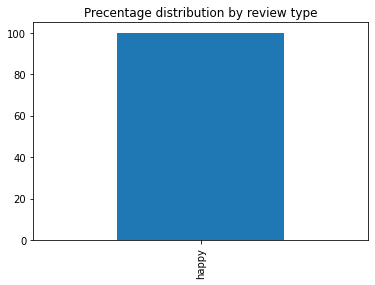

In [26]:
%matplotlib inline

round(ls.Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title("Precentage distribution by review type")
plt.show()

NameError: name 'pd' is not defined

# Regression

In [40]:
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'number of positive reviews')

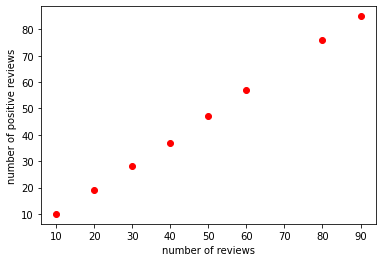

In [41]:
dic = {"resturents":['CaféSusubySuitsupply', 'Carmelinas', 'FogodeChão', 'KantipurCafe','Ostra', 'SaltieGirl','Tanám', 'Toro'],
       "posrc":[],
      "number of reviews":reviews}

for _ in resturentsList:
    df5 = getResponse(_)
    dic["posrc"].append(df5["Response"].value_counts()['happy'])
    
    

plt.scatter(dic["number of reviews"],dic["posrc"],color="red")
plt.xlabel("number of reviews")
plt.ylabel("number of positive reviews")

    
    






In [36]:
x = np.array(dic["number of reviews"])
x

array([40, 10, 60, 20, 50, 80, 30, 90])

In [38]:
y = np.array(dic["posrc"])
y

array([37, 10, 57, 19, 47, 76, 28, 85], dtype=int64)

In [43]:
model = LinearRegression()
model.fit(x.reshape(-1,1),y)


LinearRegression()

In [44]:
new_x = np.array([2000]).reshape((-1,1))
new_x

array([[2000]])

In [46]:
pred = model.predict(new_x)
pred

array([1890.95495495])

AttributeError: module 'numpy' has no attribute 'ployfit'

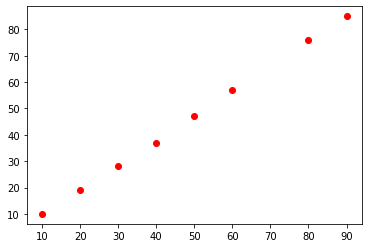

In [48]:
plt.scatter(dic["number of reviews"],dic["posrc"],color="red")
m,c = np.ployfit(x,y,1)
plt.plot(x,m*x+c)